In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

master = pd.read_csv("data/clean/country_snapshot_master.csv")
scaled_master = pd.read_csv("data/clean/country_scaled_master.csv")

In [5]:
# Demographic pillar columns
demo_cols = [
    "total_population",
    "population_density",
    "urbanization_rate",
    "population_growth_pct",
    "literacy_rate_unesco",
    "life_expectancy"
]

# Economic pillar columns
econ_cols = [
    "gdp_total_usd",
    "gdp_per_capita_ppp",
    "real_gdp_growth_pct",
    "inflation_pct_wb",
    "unemployment_rate"
]

# Influence pillar columns
influ_cols = [
    "military_expenditure_pct_gdp",
    "military_expenditure_constusd",
    "wgi_gov_effectiveness",
    "Corruption_Perception_Index_2024_iso3",
]

# Metrics where lower is better (flip sign so higher = better)
negative_metrics = [
    "inflation_pct_wb",
    "unemployment_rate"
]

# Flip these metrics
for col in negative_metrics:
    if col in master.columns:
        master[col] = master[col] * -1

In [6]:
scaler = StandardScaler()

# Scale Demographic pillar
demo_scaled = pd.DataFrame(
    scaler.fit_transform(master[demo_cols]),
    columns=demo_cols,
    index=master.index
)

# Scale Economic pillar
econ_scaled = pd.DataFrame(
    scaler.fit_transform(master[econ_cols]),
    columns=econ_cols,
    index=master.index
)

# Scale Influence pillar
influ_scaled = pd.DataFrame(
    scaler.fit_transform(master[influ_cols]),
    columns=influ_cols,
    index=master.index
)

In [7]:
scaled_master = pd.concat(
    [master["iso3"], demo_scaled, econ_scaled, influ_scaled], 
    axis=1
)

# Save for modeling
scaled_master.to_csv("data/clean/country_scaled_master.csv", index=False)
print("✅ Saved scaled master table.")


✅ Saved scaled master table.


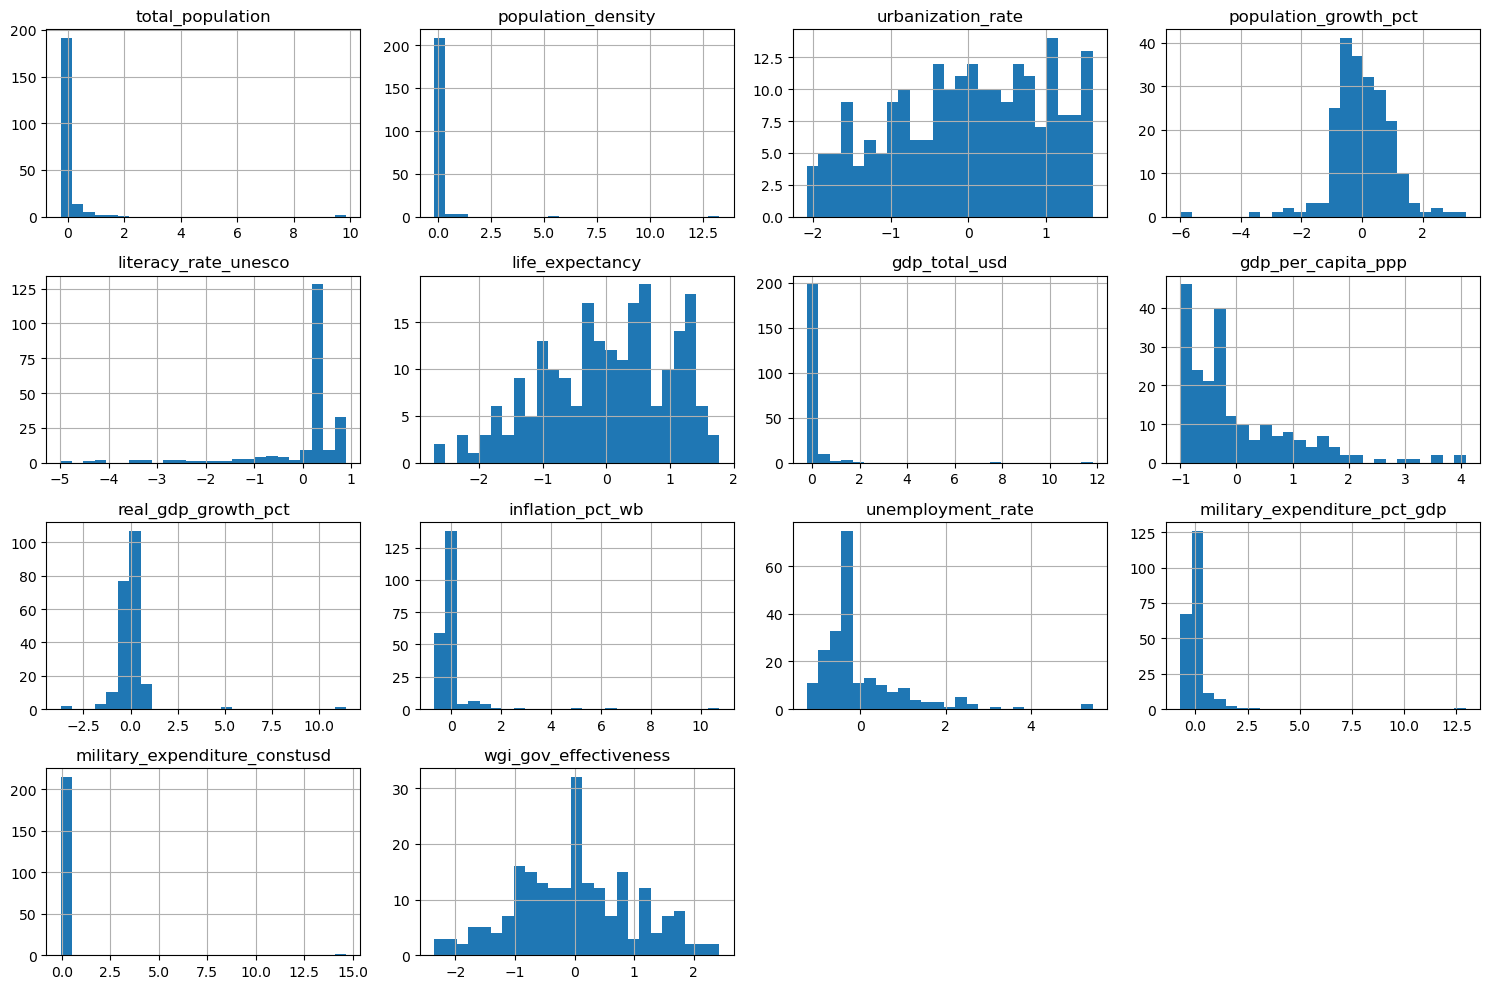

In [9]:
import matplotlib.pyplot as plt
scaled_master.hist(bins=25, figsize=(15,10))
plt.tight_layout()


<Axes: >

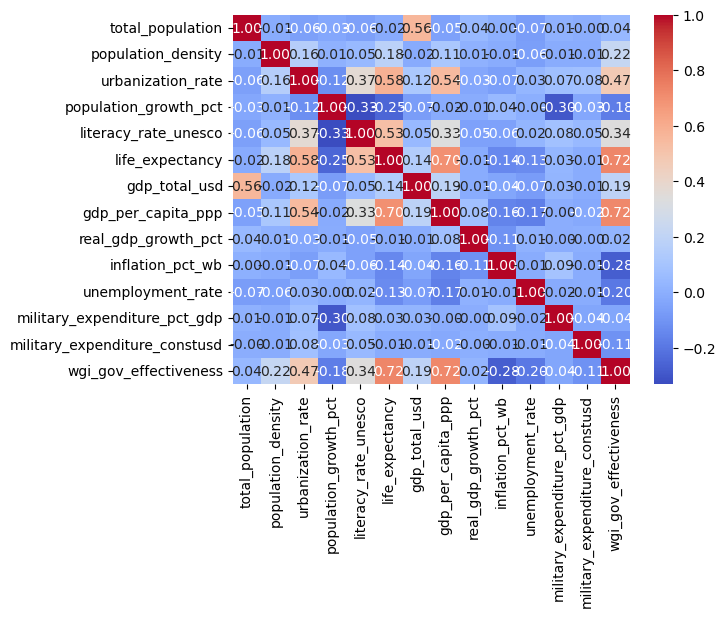

In [11]:
import seaborn as sns
corr = scaled_master.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")